### Importing relevant libraries

In [809]:
from bs4 import BeautifulSoup 
import pandas as pd
import ast
import requests
from tqdm import tqdm
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
import ast
import numpy as np
import random
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, TimeoutException
import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
import re
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

### Scraping First Subreddit

In [22]:
driver = webdriver.Chrome()
Commentlist = []
url = "https://www.reddit.com/r/AskReddit/comments/6lhv7v/what_is_the_best_us_state_to_live_in_and_why/"
driver.get(url)
time.sleep(3)

comments_selector = "#-post-rtjson-content" 

while True:

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

    try:
        view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
        view_more_comments_button.click()

        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector))
        )
    except (NoSuchElementException, TimeoutException):
        print("No more 'View More Comments' button found or timed out waiting for comments to load.")
        break
    time.sleep(4)
    comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
    for element in comments_elements:
        full_comment_text = element.text.strip()
        if full_comment_text not in Commentlist:
            Commentlist.append(full_comment_text)

df = pd.DataFrame(Commentlist, columns=['Comments'])
print(df)

driver.quit()

No more 'View More Comments' button found or timed out waiting for comments to load.
                                               Comments
0     "Well structured comment about what state is b...
1     TIL people like a lot of states. Except Illino...
2     Find comment "Idaho"\nNo comments found.\nSoun...
3     Not Illinois, that's for fucking sure. Source:...
4     I'll chime in with Maine. Gorgeous scenery. Mo...
...                                                 ...
1160          Arkansas has a pretty vibrant boob scene.
1161                        ain't a fucking state, boy.
1162  Dear Canada:\nPlease tell New Brunswick to lay...
1163  Dude, if your parents are giving you a busines...
1164                             You're triggggering me

[1165 rows x 1 columns]


In [224]:
df.iloc[100:110]

,Comments
100,NJ. Wawa
101,"Connecticut, our state government is a joke, y..."
102,"Florida, we get weird news with a side of mosq..."
103,Utah! Salt Lake is surrounded by beautiful mou...
104,Florida - because no matter how crazy you thin...
105,Kentucky. The winters are amazing here. Theyre...
106,I think we can all agree America is amazing Ex...
107,"That whole region around Mississippi.\nLike, t..."
108,"Ohio. We have some kick ass beer, the most ast..."
109,A state so bad that it makes people want to le...


In [28]:
df.to_csv("One.csv") #Saving Results

### Scraping second subreddit

In [27]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")
driver = webdriver.Chrome(options=options)

Commentlist = []
url = "https://www.reddit.com/r/AskAnAmerican/comments/7q633e/how_would_you_rank_the_50_states_from_worst_to/"
driver.get(url)

time.sleep(random.uniform(2, 5))

comments_selector = "#-post-rtjson-content"

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(3, 6))

    try:
        view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
        view_more_comments_button.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector)))
    except (NoSuchElementException, TimeoutException):
        print("No more 'View More Comments' button found or timed out waiting for comments to load.")
        break

    time.sleep(random.uniform(3, 6))

    comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
    for element in comments_elements:
        full_comment_text = element.text.strip()
        if full_comment_text not in Commentlist:
            Commentlist.append(full_comment_text)

df2 = pd.DataFrame(Commentlist, columns=['Comments'])
print(df2)

driver.quit()

No more 'View More Comments' button found or timed out waiting for comments to load.
                                             Comments
0   This thread certainly won't turn into a flamewar.
1   Alabama Alaska Arizona Arkansas California Col...
2         I don't even have an opinion on most states
3   Good thing about Idaho is that we would probab...
4                         Michigan\n.\n.\n.\n50) Ohio
5   50-way tie for #1. Every one of them has somet...
6   Michigan is the best. Ohio is the worst. No st...
7   California\nAlaska\nHawaii\nMaine\nMontana\nEv...
8   If we define "better" states as states that in...
9   Even I don't dislike Oregon as much as you app...
10  Out of the state's I've lived and visited in:\...
11  Interesting.\nWhat put South Dakota so high up...
12  Just put Alabama as the worst. Rest is up for ...
13                      You Georgia fans are so salty
14  I can't list but I can categorize from my Texa...
15  Only ranking states I've been to. Florida is m.

In [31]:
df2.to_csv("Two.csv") #Saving Results

### Scraping third Subreddit

In [33]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")
driver = webdriver.Chrome(options=options)

Commentlist = []
url = "https://www.reddit.com/r/AskReddit/comments/urs49t/whats_the_best_state_in_the_united_states_and_why/"
driver.get(url)

time.sleep(random.uniform(2, 5))

comments_selector = "#-post-rtjson-content"

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(3, 6))

    try:
        view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
        view_more_comments_button.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector)))
    except (NoSuchElementException, TimeoutException):
        print("No more 'View More Comments' button found or timed out waiting for comments to load.")
        break

    time.sleep(random.uniform(3, 6))

    comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
    for element in comments_elements:
        full_comment_text = element.text.strip()
        if full_comment_text not in Commentlist:
            Commentlist.append(full_comment_text)

df3 = pd.DataFrame(Commentlist, columns=['Comments'])
print(df3)

driver.quit()

No more 'View More Comments' button found or timed out waiting for comments to load.
                                              Comments
0                        Glad no one is saying Oregon.
1    If the Human Development Index is to be believ...
2    I thought that was a mountain range in Alaska....
3     My mental state cause I’m having a glorious day.
4    North Dakota, its so flat, you can watch your ...
..                                                 ...
373                               Username checks out.
374  Shh shh, dude you can't say stuff like that on...
375                         Lol, seen the news lately?
376           The Stars at Night Are Big and Bright...
377  Full on half of the states have constitutional...

[378 rows x 1 columns]


In [36]:
df3.to_csv("Three.csv")  #Saving Results

In [100]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")
driver = webdriver.Chrome(options=options)

Commentlist = []
url = "https://www.reddit.com/r/ask/comments/ysv94j/what_is_the_best_state_to_live_in_usa/"
driver.get(url)

time.sleep(random.uniform(2, 5))

comments_selector = "#-post-rtjson-content"

try:
    scraping = False  
    comment_count = 0

    for _ in tqdm(range(2000)): 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(random.uniform(3, 6))

        try:
            view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
            view_more_comments_button.click()
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector)))
        except (NoSuchElementException, TimeoutException):
            print("No more 'View More Comments' button found or timed out waiting for comments to load.")
            break

        comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
        for element in comments_elements:
            full_comment_text = element.text.strip()
            if full_comment_text not in Commentlist:
                comment_count += 1
                if comment_count >= 1510:  
                    scraping = True
                if scraping:
                    Commentlist.append(full_comment_text)

except Exception as e:
    print(f"Error occurred: {e}")

finally:
    df4 = pd.DataFrame(Commentlist, columns=['Comments'])
    print(df4)
    driver.quit()


  2%|▌                                     | 30/2000 [40:11<43:59:41, 80.40s/it]

No more 'View More Comments' button found or timed out waiting for comments to load.
                                               Comments
0     The State of Denial. There aren't any problems...
1                                   The State of Denial
2      Unless you LOVE playing hockey, def not Michigan
3                                          None of them
4      Washington, because I live here and I'm the best
...                                                 ...
2381  Probably Texas.\nDefinitely not Cali, NY, Flor...
2382  Texas 💀 but seriously, born raised, it’s a sol...
2383  An extensive and very serious list of my perso...
2384                                 You sound butthurt
2385  Have a winter house in Florida and it’s awesom...

[2386 rows x 1 columns]


In [213]:
Data=pd.concat([df,df2,df3,df4],axis=0) #Stacking results

In [226]:
Data=Data.drop_duplicates(subset=['Comments'])
Data=Data.reset_index()

In [223]:
Data

,Comments
0,"""Well structured comment about what state is b..."
1,TIL people like a lot of states. Except Illino...
2,"Find comment ""Idaho""\nNo comments found.\nSoun..."
3,"Not Illinois, that's for fucking sure. Source:..."
4,I'll chime in with Maine. Gorgeous scenery. Mo...
...,...
3929,"Probably Texas.\nDefinitely not Cali, NY, Flor..."
3930,"Texas 💀 but seriously, born raised, it’s a sol..."
3931,An extensive and very serious list of my perso...
3932,You sound butthurt


In [242]:
data.to_csv("Sentiment.csv") #Saving results

### Scraping the next one

In [228]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")
driver = webdriver.Chrome(options=options)

Commentlist = []
url = "https://www.reddit.com/r/AskAnAmerican/comments/jjny83/just_curious_what_are_your_top_ten_favorite_states/"
driver.get(url)

time.sleep(random.uniform(2, 5))

comments_selector = "#-post-rtjson-content"

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(3, 6))

    try:
        view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
        view_more_comments_button.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector)))
    except (NoSuchElementException, TimeoutException):
        print("No more 'View More Comments' button found or timed out waiting for comments to load.")
        break

    time.sleep(random.uniform(3, 6))

    comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
    for element in comments_elements:
        full_comment_text = element.text.strip()
        if full_comment_text not in Commentlist:
            Commentlist.append(full_comment_text)

df5 = pd.DataFrame(Commentlist, columns=['Comments'])
print(df5)

driver.quit()

No more 'View More Comments' button found or timed out waiting for comments to load.
                                              Comments
0    Shockingly, I find most people choosing their ...
1    solid, liquid, gas, plasma, despair, anarchy, ...
2    In no particular order, and not necessarily to...
3    North Carolina\nMinnesota\nNew York\nVirginia\...
4    1.New York\n2. New Jersey\n3. Florida\n4. Loui...
..                                                 ...
384  I guess I'll give this a try, in no order:\n-W...
385  California, Hawaii and New York. Everything el...
386  My list :\n1.California\n2.Washington\n3.Minne...
387  I don't have 10 favorites - just 1: Pennsylvan...
388  Honestly, I would be surprised if most America...

[389 rows x 1 columns]


In [232]:
data=pd.concat([Data,df5],axis=0)

In [234]:
data.value_counts()

Comments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Scraping & Stacking next

In [235]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")
driver = webdriver.Chrome(options=options)

Commentlist = []
url = "https://www.reddit.com/r/ask/comments/11nsm8g/what_is_the_best_state_to_live_in_usa/"
driver.get(url)

time.sleep(random.uniform(2, 5))

comments_selector = "#-post-rtjson-content"

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(3, 6))

    try:
        view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
        view_more_comments_button.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector)))
    except (NoSuchElementException, TimeoutException):
        print("No more 'View More Comments' button found or timed out waiting for comments to load.")
        break

    time.sleep(random.uniform(3, 6))

    comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
    for element in comments_elements:
        full_comment_text = element.text.strip()
        if full_comment_text not in Commentlist:
            Commentlist.append(full_comment_text)

df6 = pd.DataFrame(Commentlist, columns=['Comments'])
print(df6)

driver.quit()

No more 'View More Comments' button found or timed out waiting for comments to load.
                                              Comments
0                                                     
1    I would like to live in a state of financial s...
2    There is no one best state, it all depends on ...
3               Whichever state has the greenest grass
4                   Sooo... Not the blue grass region.
..                                                 ...
573            Hawaii because it's not on the mainland
574  Connecticut. It’s legal to drink in a car as l...
575     Where are my NC lovers? Best place in the U.S.
576  I don't live there but Colorado. Big. Fucking....
577                              Alive and sober state

[578 rows x 1 columns]


In [236]:
df6

,Comments
0,
1,I would like to live in a state of financial s...
2,"There is no one best state, it all depends on ..."
3,Whichever state has the greenest grass
4,Sooo... Not the blue grass region.
...,...
573,Hawaii because it's not on the mainland
574,Connecticut. It’s legal to drink in a car as l...
575,Where are my NC lovers? Best place in the U.S.
576,I don't live there but Colorado. Big. Fucking....


In [239]:
data=pd.concat([data,df6],axis=0)
data

,Comments
0,"""Well structured comment about what state is b..."
1,TIL people like a lot of states. Except Illino...
2,"Find comment ""Idaho""\nNo comments found.\nSoun..."
3,"Not Illinois, that's for fucking sure. Source:..."
4,I'll chime in with Maine. Gorgeous scenery. Mo...
...,...
573,Hawaii because it's not on the mainland
574,Connecticut. It’s legal to drink in a car as l...
575,Where are my NC lovers? Best place in the U.S.
576,I don't live there but Colorado. Big. Fucking....


### Keeping up

In [240]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")
driver = webdriver.Chrome(options=options)

Commentlist = []
url = "https://www.reddit.com/r/preppers/comments/yhjtmo/best_usa_state_for_shtf/"
driver.get(url)

time.sleep(random.uniform(2, 5))

comments_selector = "#-post-rtjson-content"

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(random.uniform(3, 6))

    try:
        view_more_comments_button = driver.find_element(By.XPATH, '//*[@id="comment-tree"]/faceplate-partial/div[1]/button/span/span[2]')
        view_more_comments_button.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, comments_selector)))
    except (NoSuchElementException, TimeoutException):
        print("No more 'View More Comments' button found or timed out waiting for comments to load.")
        break

    time.sleep(random.uniform(3, 6))

    comments_elements = driver.find_elements(By.CSS_SELECTOR, comments_selector)
    for element in comments_elements:
        full_comment_text = element.text.strip()
        if full_comment_text not in Commentlist:
            Commentlist.append(full_comment_text)

df7 = pd.DataFrame(Commentlist, columns=['Comments'])
print(df7)

driver.quit()

No more 'View More Comments' button found or timed out waiting for comments to load.
                                              Comments
0                Glad to see my state not mentioned 👍🏻
1    Yeah, I'd hate if everyone found out that New ...
2    if it's the best, everyone figures this out an...
3    Highly recommend the book Strategic Location. ...
4    Live in Montana now, and all I can say is the ...
..                                                 ...
188                                                   
189  No. Nope. Uh uh. We're full. This is a terribl...
190  My sibling just built a house there, literally...
191                                         Hogs shit.
192  You heard wrong. Also “California” and “cheap”...

[193 rows x 1 columns]


In [241]:
data=pd.concat([data,df7],axis=0)
data

,Comments
0,"""Well structured comment about what state is b..."
1,TIL people like a lot of states. Except Illino...
2,"Find comment ""Idaho""\nNo comments found.\nSoun..."
3,"Not Illinois, that's for fucking sure. Source:..."
4,I'll chime in with Maine. Gorgeous scenery. Mo...
...,...
188,
189,No. Nope. Uh uh. We're full. This is a terribl...
190,"My sibling just built a house there, literally..."
191,Hogs shit.


In [245]:
data.iloc[2022:2032]

,Comments
2022,Hopefulness about our future
2023,Florida. because when shit pops off in Florida...
2024,Liquid
2025,Live in a state of ignorance and you won’t hav...
2026,"Colorado, if you don’t need the ocean. Best ba..."
2027,I think it depends greatly on what you're look...
2028,"Minnesota! Its cold, comfy, nobody lives here,..."
2029,Hawaii and it’s not even close.\nAs much as I ...
2030,"It’s Hawaii, if you can’t live there I’ll plug..."
2031,not ohio.


In [251]:
data

,Comments
0,"""Well structured comment about what state is b..."
1,TIL people like a lot of states. Except Illino...
2,"Find comment ""Idaho""\nNo comments found.\nSoun..."
3,"Not Illinois, that's for fucking sure. Source:..."
4,I'll chime in with Maine. Gorgeous scenery. Mo...
...,...
188,
189,No. Nope. Uh uh. We're full. This is a terribl...
190,"My sibling just built a house there, literally..."
191,Hogs shit.


#### Time to explore and match comments to states

In [12]:
states = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}


In [258]:
def check_states_in_comments(df, states):
    df['states_mentioned'] = df['Comments'].apply(lambda comment: [state for state, abbr in states.items() if state in comment or abbr in comment])
    return df

In [259]:
check_states_in_comments(data, states)

,Comments,states_mentioned
0,"""Well structured comment about what state is b...",[Illinois]
1,TIL people like a lot of states. Except Illino...,[Illinois]
2,"Find comment ""Idaho""\nNo comments found.\nSoun...",[Idaho]
3,"Not Illinois, that's for fucking sure. Source:...",[Illinois]
4,I'll chime in with Maine. Gorgeous scenery. Mo...,[Maine]
...,...,...
188,,[]
189,No. Nope. Uh uh. We're full. This is a terribl...,[]
190,"My sibling just built a house there, literally...",[]
191,Hogs shit.,[]


In [302]:
DF =data[data["states_mentioned"].apply(lambda x: len(x) > 0)]
DF

,Comments,states_mentioned
0,"""Well structured comment about what state is b...","[illinois, indiana]"
1,TIL people like a lot of states. Except Illino...,[illinois]
2,"Find comment ""Idaho""\nNo comments found.\nSoun...",[idaho]
3,"Not Illinois, that's for fucking sure. Source:...",[illinois]
4,I'll chime in with Maine. Gorgeous scenery. Mo...,"[indiana, maine]"
...,...,...
113,"Kauai. 100% Abundance of fresh fish, hog, catt...",[hawaii]
114,"Yahbut there's a reason Kauai is called ""The E...",[hawaii]
115,North Dakota,[north dakota]
116,People don't know how bountiful the Sierras an...,[nevada]


In [304]:
DF = DF.drop(DF.index[0])
DF

,Comments,states_mentioned
1,TIL people like a lot of states. Except Illino...,[illinois]
2,"Find comment ""Idaho""\nNo comments found.\nSoun...",[idaho]
3,"Not Illinois, that's for fucking sure. Source:...",[illinois]
4,I'll chime in with Maine. Gorgeous scenery. Mo...,"[indiana, maine]"
5,Not fucking Illinois,[illinois]
...,...,...
113,"Kauai. 100% Abundance of fresh fish, hog, catt...",[hawaii]
114,"Yahbut there's a reason Kauai is called ""The E...",[hawaii]
115,North Dakota,[north dakota]
116,People don't know how bountiful the Sierras an...,[nevada]


In [45]:
def refined_check_states_in_comments_v6(df, states):
    excluded_abbreviations = ['IN', 'OR', 'ME'] # These abbreviations messing results

    def word_or_standalone_abbr_pattern(word, abbr):
        if abbr not in excluded_abbreviations:
            return r'\b' + re.escape(word) + r'\b|(?<=\W)' + re.escape(abbr) + r'(?=\W)'
        else:
            return r'\b' + re.escape(word) + r'\b'

    def find_states(comment):
        if not isinstance(comment, str):
            return []

        mentioned = []
        for state, abbr in states.items():
            if re.search(word_or_standalone_abbr_pattern(state, abbr), comment, re.IGNORECASE):
                mentioned.append(state)
        return mentioned
    df['refined_states_mentioned'] = df['Comments'].apply(find_states)
    return df


Dfd = refined_check_states_in_comments_v6(DF, states)
Dfd.head()

,Unnamed: 0,Comments,states_mentioned,diagnostic_info,refined_states_mentioned
0,1,til people like a lot of states except illinoi...,[Illinois],[Full name match: Illinois],[Illinois]
1,2,find comment idaho\nno comments found\nsounds ...,[Idaho],[Full name match: Idaho],[Idaho]
2,3,not illinois thats for fucking sure source fro...,[Illinois],[Full name match: Illinois],[Illinois]
3,4,ill chime in with maine gorgeous scenery mount...,"[Indiana, Maine]","[Abbreviation match: IN, Full name match: Maine]",[Maine]
4,5,not fucking illinois,[Illinois],[Full name match: Illinois],[Illinois]


### We can distinguish three types of matches: the "States Mentioned" column checks for matches and adds them, the "Diagnostic Info" column diagnoses whether it's a full match or an abbreviation match, and the "Refined" column resonates with exact matches.

In [135]:
Dfd2=Dfd2.reset_index()
Dfd2=Dfd2.drop(["index"],axis=1)

In [87]:
Dfd2 = Dfd.copy()
Dfd2 = Dfd2[Dfd2["refined_states_mentioned"].apply(lambda x: x != [])]
Dfd2

,Unnamed: 0,Comments,states_mentioned,diagnostic_info,refined_states_mentioned,Unnamed: 0.1,Unnamed: 0.2
0,1,til people like a lot of states except illinoi...,[Illinois],[Full name match: Illinois],[Illinois],NaN,NaN
1,2,find comment idaho\nno comments found\nsounds ...,[Idaho],[Full name match: Idaho],[Idaho],NaN,NaN
2,3,not illinois thats for fucking sure source fro...,[Illinois],[Full name match: Illinois],[Illinois],NaN,NaN
3,4,ill chime in with maine gorgeous scenery mount...,"[Indiana, Maine]","[Abbreviation match: IN, Full name match: Maine]",[Maine],NaN,NaN
4,5,not fucking illinois,[Illinois],[Full name match: Illinois],[Illinois],NaN,NaN
...,...,...,...,...,...,...,...
131,2777,washington hands down as far as i know no othe...,"['Indiana', 'Washington']","['Abbreviation match: IN', 'Abbreviation match...",[Washington],2214.0,219.0
168,3450,kentucky what we lack in legal weed we make up...,['Indiana'],['Abbreviation match: IN'],[Kentucky],2785.0,284.0
169,3483,suburbs in pennsylvania,['Indiana'],['Abbreviation match: IN'],[Pennsylvania],2812.0,285.0
198,84,why has no one said upstate new york,['New York'],['Abbreviation match: NY'],[New York],3613.0,335.0


### Ensuring data completeness

In [88]:
def is_nonempty_list(x):
    if isinstance(x, list):
        return len(x) > 0
    return False

Dfd2 = Dfd2[Dfd2["refined_states_mentioned"].apply(is_nonempty_list)]

In [102]:
Dfd2.loc[Dfd2["Comments"].str.contains("\n"), "Comments"] = Dfd2.loc[Dfd2["Comments"].str.contains("\n"), "Comments"].str.replace("\n", "")

In [816]:
Dfd2 = Dfd2.drop(["states_mentioned", "diagnostic_info", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0"], axis=1)

In [93]:
Dfd2["refined_states_mentioned"].value_counts()

[California]                 289
[Texas]                      183
[Florida]                    180
[Ohio]                       180
[Michigan]                   131
                            ... 
[Mississippi, Ohio]            1
[Florida, Michigan, Ohio]      1
[Kansas, Nebraska]             1
[Iowa, Kansas, Nebraska]       1
[South Dakota, Wyoming]        1
Name: refined_states_mentioned, Length: 957, dtype: int64

In [94]:
Dfd2.to_csv("Sentiment3.csv")

In [799]:
Datastate=DF.copy()
Datastate.head()

,Comments,refined_states_mentioned
0,til people like a lot of states except illinoi...,[Illinois]
1,find comment idahono comments foundsounds abou...,[Idaho]
2,not illinois thats for fucking sure source fro...,[Illinois]
3,ill chime in with maine gorgeous scenery mount...,[Maine]
4,not fucking illinois,[Illinois]


In [444]:
Datastate=Datastate.reset_index()

In [806]:
Datastate=Datastate.drop(["index"],axis=1)
Datastate.head(10)

,Comments,refined_states_mentioned
0,til people like a lot of states except illinoi...,[Illinois]
1,find comment idahono comments foundsounds abou...,[Idaho]
2,not illinois thats for fucking sure source fro...,[Illinois]
3,ill chime in with maine gorgeous scenery mount...,[Maine]
4,not fucking illinois,[Illinois]
5,as someone from illinois reading this thread,[Illinois]
6,minnesotawe have over lakes and miles of dens...,[Minnesota]
7,alaska grew up there youve got some of the mos...,[Alaska]
8,alabamajust kidding dont move here its awful,[Alabama]
9,not illinois its garbage here but i dont want ...,[Illinois]


### As Subreddit questions were "Which is the best state?" , Some people only commented state name, that's why  I added best word to rows where there is only state names . It will increase our model's performance

In [807]:
Datastate.loc[Datastate["Comments"].str.len() < 14, "Comments"] = Datastate.loc[Datastate["Comments"].str.len() < 14, "Comments"].apply(lambda x: str(x) + " Best")
Datastate.head(10)

,Comments,refined_states_mentioned
0,til people like a lot of states except illinoi...,[Illinois]
1,find comment idahono comments foundsounds abou...,[Idaho]
2,not illinois thats for fucking sure source fro...,[Illinois]
3,ill chime in with maine gorgeous scenery mount...,[Maine]
4,not fucking illinois,[Illinois]
5,as someone from illinois reading this thread,[Illinois]
6,minnesotawe have over lakes and miles of dens...,[Minnesota]
7,alaska grew up there youve got some of the mos...,[Alaska]
8,alabamajust kidding dont move here its awful,[Alabama]
9,not illinois its garbage here but i dont want ...,[Illinois]


### Cleaning Data from numbers

In [452]:
Datastate["Comments"] = Datastate["Comments"].str.replace(r'[0-9-]', ' ', regex=True)

In [461]:
Datastate.to_csv("Datastate.csv")

### Making sure State column consists of lists

In [462]:
import ast  

def convert_to_list(row):
    try:
        
        if isinstance(row, str) and row.startswith('['):
            return ast.literal_eval(row)

        elif isinstance(row, str):
            return [row]
        else:
            return row
    except (ValueError, SyntaxError):
        return None  
Datastate['refined_states_mentioned'] = Datastate['refined_states_mentioned'].apply(convert_to_list)
Datastate

,Comments,refined_states_mentioned
0,til people like a lot of states except illinoi...,[Illinois]
1,find comment idahono comments foundsounds abou...,[Idaho]
2,not illinois thats for fucking sure source fro...,[Illinois]
3,ill chime in with maine gorgeous scenery mount...,[Maine]
4,not fucking illinois,[Illinois]
...,...,...
4007,The rapid growth of cities like Denver and Aus...,[Colorado]
4008,"Ohio is mentioned without specific context, su...",[Ohio]
4009,Wyoming is known for its open spaces and less ...,[Wyoming]
4010,West Virginia offers a unique blend of natural...,[West Virginia]


In [469]:
Datastate[Datastate.apply(lambda row: '[Guam]' not in row.values, axis=1)]
Datastate

,Comments,refined_states_mentioned
0,til people like a lot of states except illinoi...,[Illinois]
1,find comment idahono comments foundsounds abou...,[Idaho]
2,not illinois thats for fucking sure source fro...,[Illinois]
3,ill chime in with maine gorgeous scenery mount...,[Maine]
4,not fucking illinois,[Illinois]
...,...,...
4007,The rapid growth of cities like Denver and Aus...,[Colorado]
4008,"Ohio is mentioned without specific context, su...",[Ohio]
4009,Wyoming is known for its open spaces and less ...,[Wyoming]
4010,West Virginia offers a unique blend of natural...,[West Virginia]


In [520]:
def contains_mexico(state_list):
    return "Washington DC" in [state.strip('[]') for state in state_list]
mask = Datastate['refined_states_mentioned'].apply(contains_mexico)

selected_rows = Datastate[mask]

In [521]:
selected_rows

,Comments,refined_states_mentioned
3866,"DC's political hub is intriguing, but the city...",[Washington DC]


### Deleting Rows where they contains any names other than state names , for example : Puerto rico , Guam , OR Dc

In [522]:
indices_to_drop = [3884, 3770, 3288, 3375, 3312, 3301, 3237, 3203, 3883, 3882, 3877, 3866]

Datastate = Datastate.drop(indices_to_drop)

Datastate.reset_index(drop=True, inplace=True)

In [523]:
Datastate["refined_states_mentioned"].value_counts().tail(30)

[Arizona]           71
[Maryland]          67
[Montana]           63
[New Hampshire]     61
[Tennessee]         58
[Alabama]           57
[Utah]              56
[Vermont]           53
[Maine]             53
[Wyoming]           50
[Indiana]           49
[Idaho]             47
[Kentucky]          45
[Louisiana]         45
[Iowa]              44
[Missouri]          44
[Connecticut]       42
[Mississippi]       37
[Oklahoma]          36
[Kansas]            35
[New Mexico]        33
[Arkansas]          31
[West Virginia]     30
[Delaware]          29
[Nevada]            27
[South Carolina]    26
[Nebraska]          25
[Rhode Island]      21
[South Dakota]      20
[North Dakota]      20
Name: refined_states_mentioned, dtype: int64

In [525]:
Datastate.to_csv("Datastate.csv") # Saving final dataset

# Comparing by Mean

In [526]:
DatastateF=pd.read_csv("/Users/aa085/Music/Datastate_with_sentiments.csv")

### Modifying Numbers

In [528]:
DatastateF.loc[DatastateF["Sentiment"] == "NEGATIVE", "Sentiment_Score"] = DatastateF.loc[DatastateF["Sentiment"] == "NEGATIVE", "Sentiment_Score"].apply(lambda x: x * -1)
DatastateF

,Unnamed: 0,Comments,refined_states_mentioned,Sentiment,Sentiment_Score
0,0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928
1,1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904
2,2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009
3,3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681
4,4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489
...,...,...,...,...,...
3995,3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528
3996,3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241
3997,3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584
3998,3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874


In [532]:
DatastateF.groupby("refined_states_mentioned").mean().sort_values(by="Sentiment_Score",ascending=False)

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_46544/3896048492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DatastateF.groupby("refined_states_mentioned").mean().sort_values(by="Sentiment_Score",ascending=False)


,Sentiment_Score
refined_states_mentioned,
['Virginia'],0.613680
['Rhode Island'],0.605484
['Pennsylvania'],0.514275
['Vermont'],0.496495
['Washington'],0.491050
['North Carolina'],0.478950
['Alaska'],0.454663
['Minnesota'],0.454215
['Massachusetts'],0.449670


In [544]:
DatastateF.groupby("refined_states_mentioned").count().sort_values(by="Sentiment")

,Comments,Sentiment,Sentiment_Score
refined_states_mentioned,,,
['North Dakota'],20,20,20
['South Dakota'],20,20,20
['Rhode Island'],21,21,21
['Nebraska'],25,25,25
['South Carolina'],26,26,26
['Nevada'],27,27,27
['Delaware'],29,29,29
['West Virginia'],30,30,30
['Arkansas'],31,31,31


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_46544/1071833827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Counts["Comments"],kde=True)


<Axes: xlabel='Comments', ylabel='Density'>

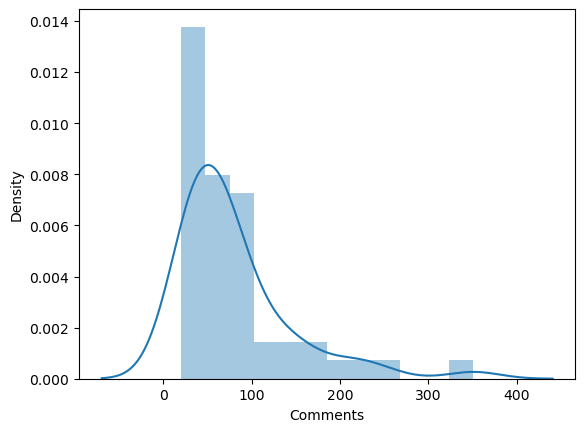

In [546]:
Counts=DatastateF.groupby("refined_states_mentioned").count().sort_values(by="Sentiment")
sns.distplot(Counts["Comments"],kde=True)

# Comparing by weighted averages

### Defining weights

In [551]:
Counts['Weights'] = Counts['Comments'] / Counts['Comments'].sum()
Counts

,Comments,Sentiment,Sentiment_Score,Wights,Weights
refined_states_mentioned,,,,,
['North Dakota'],20,20,20,1.0,0.00500
['South Dakota'],20,20,20,1.0,0.00500
['Rhode Island'],21,21,21,1.0,0.00525
['Nebraska'],25,25,25,1.0,0.00625
['South Carolina'],26,26,26,1.0,0.00650
['Nevada'],27,27,27,1.0,0.00675
['Delaware'],29,29,29,1.0,0.00725
['West Virginia'],30,30,30,1.0,0.00750
['Arkansas'],31,31,31,1.0,0.00775


### Finding counts to define weights

In [556]:
def count(item):
    if isinstance(item, list):
        return len(item)
    else:
        return 0  

DatastateF["Counts"] = DatastateF["refined_states_mentioned"].apply(count)

In [563]:
category_counts = DatastateF['refined_states_mentioned'].value_counts().reset_index()
category_counts.columns = ['Category', 'Counts']

DatastateF = pd.merge(DatastateF, category_counts, left_on='refined_states_mentioned', right_on='Category', how='left')

DatastateF = DatastateF.drop(columns='Category')
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160
...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30


### Finding weights of each comment

In [564]:
DatastateF["weightsum"]=DatastateF["Sentiment_Score"]*DatastateF["Counts"]
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts,weightsum
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160,-158.548412
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47,41.919468
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160,-159.681482
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53,52.877113
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160,-159.278269
...,...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135,133.451217
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207,-206.842787
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50,44.279221
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30,29.996220


### Weights for each state

In [565]:
DatastateF.groupby("refined_states_mentioned").sum()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_46544/980835351.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DatastateF.groupby("refined_states_mentioned").sum()


,Sentiment_Score,Counts,weightsum
refined_states_mentioned,,,
['Alabama'],-5.134121,3249,-292.644890
['Alaska'],34.554407,5776,2626.134946
['Arizona'],17.699005,5041,1256.629385
['Arkansas'],-4.989215,961,-154.665675
['California'],74.339118,123201,26093.030482
['Colorado'],24.900996,18225,3361.634432
['Connecticut'],10.045896,1764,421.927649
['Delaware'],5.136359,841,148.954400
['Florida'],37.170537,46656,8028.836055


### Finding sum of all weights

In [567]:
total_weights = DatastateF["weightsum"].sum()
DatastateF["Totals"]=total_weights
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts,weightsum,Totals
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160,-158.548412,99087.396678
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47,41.919468,99087.396678
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160,-159.681482,99087.396678
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53,52.877113,99087.396678
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160,-159.278269,99087.396678
...,...,...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135,133.451217,99087.396678
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207,-206.842787,99087.396678
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50,44.279221,99087.396678
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30,29.996220,99087.396678


In [577]:
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts,weightsum,Totals
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160,-158.548412,99087.396678
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47,41.919468,99087.396678
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160,-159.681482,99087.396678
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53,52.877113,99087.396678
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160,-159.278269,99087.396678
...,...,...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135,133.451217,99087.396678
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207,-206.842787,99087.396678
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50,44.279221,99087.396678
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30,29.996220,99087.396678


In [828]:
FinalD = DatastateF.groupby("refined_states_mentioned").sum().iloc[:,1:3]
#Includes weights for each state 

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_46544/3560662780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  FinalD = DatastateF.groupby("refined_states_mentioned").sum().iloc[:,1:3]


In [592]:
FinalD["Totals"]=total_weights #Adding total weights 
FinalD["Weighted Average"]=FinalD["weightsum"]/FinalD["Totals"]
StatesWA=FinalD.sort_values(by="Weighted Average",ascending=False) # Sorting & Storing final results

In [718]:
StatesWA.to_csv("StatesWA.csv")

### States Sorted by weighted averages

In [827]:
StatesWA.iloc[:,[0,2,3,4]]

,refined_states_mentioned,weightsum,Totals,Weighted Average
0,['California'],26093.030482,99087.396678,0.263333
1,['Washington'],10041.479770,99087.396678,0.101340
2,['Michigan'],8591.603397,99087.396678,0.086707
3,['Florida'],8028.836055,99087.396678,0.081028
4,['Texas'],7232.909744,99087.396678,0.072995
5,['Massachusetts'],6803.054238,99087.396678,0.068657
6,['Virginia'],4752.338237,99087.396678,0.047961
7,['Pennsylvania'],4352.827374,99087.396678,0.043929
8,['North Carolina'],3879.498190,99087.396678,0.039152
9,['New York'],3750.938516,99087.396678,0.037855


# Comparing by Number of Positive & Negative reviews

### Categorizing Comments to Positive and Negatives

In [624]:
CategoriesCount=DatastateF.groupby(["Sentiment","refined_states_mentioned"]).count() 

In [628]:
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts,weightsum,Totals
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160,-158.548412,99087.396678
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47,41.919468,99087.396678
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160,-159.681482,99087.396678
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53,52.877113,99087.396678
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160,-159.278269,99087.396678
...,...,...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135,133.451217,99087.396678
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207,-206.842787,99087.396678
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50,44.279221,99087.396678
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30,29.996220,99087.396678


In [625]:
CategoriesCount

Comments  Sentiment_Score  Counts  \
Sentiment refined_states_mentioned                                      
NEGATIVE  ['Alabama']                     31               31      31   
          ['Alaska']                      20               20      20   
          ['Arizona']                     27               27      27   
          ['Arkansas']                    18               18      18   
          ['California']                 138              138     138   
...                                      ...              ...     ...   
POSITIVE  ['Virginia']                    72               72      72   
          ['Washington']                 107              107     107   
          ['West Virginia']               13               13      13   
          ['Wisconsin']                   54               54      54   
          ['Wyoming']                     25               25      25   

                                    weightsum  Totals  
Sentiment refined_states_mentioned                     
NEGATIVE  ['Alabama']                      31      31  
          ['Alaska']                       20      20  
          ['Arizona']                      27      27  
          ['Arkansas']                     18      18  
          ['California']                  138     138  
...                                       ...     ...  
POSITIVE  ['Virginia']                     72      72  
          ['Washington']                  107     107  
          ['West Virginia']                13      13  
          ['Wisconsin']                    54      54  
          ['Wyoming']                      25      25  

[100 rows x 5 columns]

In [617]:
Categories

### Finding number of + & - Categories per state

In [629]:
Unstacked = CategoriesCount.unstack(level='Sentiment')
Unstacked=Unstacked["Counts"]
Unstacked

Sentiment,NEGATIVE,POSITIVE
refined_states_mentioned,,
['Alabama'],31,26
['Alaska'],20,56
['Arizona'],27,44
['Arkansas'],18,13
['California'],138,213
['Colorado'],55,80
['Connecticut'],16,26
['Delaware'],12,17
['Florida'],91,125


### Sorting by Number of Positive & Negative reviews

In [630]:
Unstacked.sort_values(by="POSITIVE",ascending=False)

Sentiment,NEGATIVE,POSITIVE
refined_states_mentioned,,
['California'],138,213
['Texas'],107,139
['Florida'],91,125
['Michigan'],55,107
['Washington'],36,107
['Ohio'],111,96
['Massachusetts'],34,89
['Colorado'],55,80
['New York'],49,78


In [631]:
Unstacked.sort_values(by="NEGATIVE",ascending=False)

Sentiment,NEGATIVE,POSITIVE
refined_states_mentioned,,
['California'],138,213
['Ohio'],111,96
['Texas'],107,139
['Illinois'],101,59
['Florida'],91,125
['Colorado'],55,80
['Michigan'],55,107
['New York'],49,78
['Oregon'],45,49


### Adding percentages 

In [633]:
Unstacked["Total"]=Unstacked["NEGATIVE"]+Unstacked["POSITIVE"]
Unstacked["N Percentage"]=Unstacked["NEGATIVE"]/Unstacked["Total"]
Unstacked["P Percentage"]=Unstacked["POSITIVE"]/Unstacked["Total"]
Unstacked

Sentiment,NEGATIVE,POSITIVE,Total,N Percentage,P Percentage
refined_states_mentioned,,,,,
['Alabama'],31,26,57,0.543860,0.456140
['Alaska'],20,56,76,0.263158,0.736842
['Arizona'],27,44,71,0.380282,0.619718
['Arkansas'],18,13,31,0.580645,0.419355
['California'],138,213,351,0.393162,0.606838
['Colorado'],55,80,135,0.407407,0.592593
['Connecticut'],16,26,42,0.380952,0.619048
['Delaware'],12,17,29,0.413793,0.586207
['Florida'],91,125,216,0.421296,0.578704


In [634]:
Unstacked.sort_values(by="P Percentage",ascending=False)

Sentiment,NEGATIVE,POSITIVE,Total,N Percentage,P Percentage
refined_states_mentioned,,,,,
['Virginia'],16,72,88,0.181818,0.818182
['Rhode Island'],4,17,21,0.190476,0.809524
['Pennsylvania'],22,70,92,0.239130,0.760870
['Vermont'],13,40,53,0.245283,0.754717
['Washington'],36,107,143,0.251748,0.748252
['North Carolina'],23,67,90,0.255556,0.744444
['Alaska'],20,56,76,0.263158,0.736842
['Massachusetts'],34,89,123,0.276423,0.723577
['Minnesota'],23,58,81,0.283951,0.716049


# Comparing by Z scores

### Assessing Data Distribution 

In [833]:
average_sentiment_by_state['Sentiment_Score'].describe()

count    50.000000
mean      0.157411
std       0.254818
min      -0.610182
25%      -0.036628
50%       0.180784
75%       0.328098
max       0.613680
Name: Sentiment_Score, dtype: float64

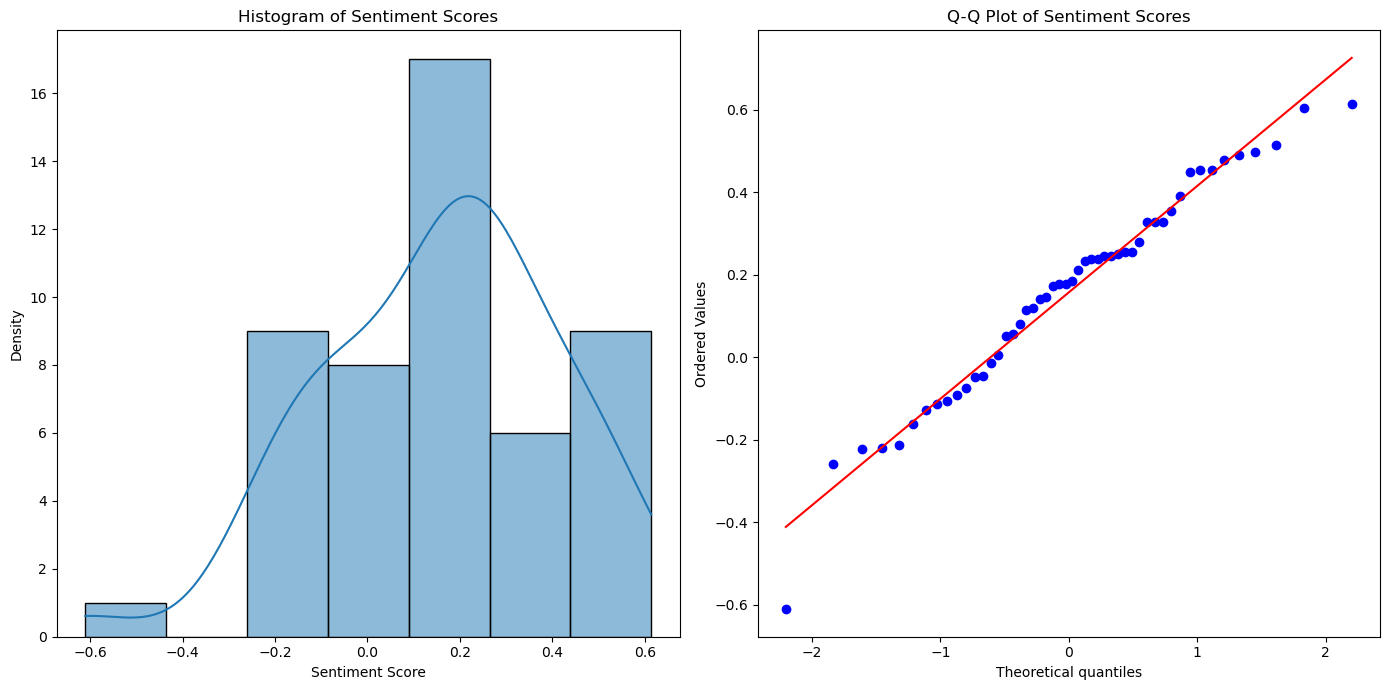

In [831]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(average_sentiment_by_state['Sentiment_Score'], kde=True)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
stats.probplot(average_sentiment_by_state['Sentiment_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sentiment Scores')

plt.tight_layout()
plt.show()

### Almost normally distributed with a few outliers, completely acceptable for comparison analysis , will not delete outliers to not losing any value , deleting any point means deleting one of the states' data

### Finding sentiment scores averages of all states in a different way than we did before 

In [676]:
Sentiment_df = DatastateF[['refined_states_mentioned', 'Sentiment_Score']]
Sentiment_df['refined_states_mentioned'] = Sentiment_df['refined_states_mentioned'].apply(ast.literal_eval)
exploded_df = Sentiment_df.explode('refined_states_mentioned')
average_sentiment_by_state = exploded_df.groupby('refined_states_mentioned')['Sentiment_Score'].mean().reset_index()
average_sentiment_by_state.head()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_46544/3026205837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sentiment_df['refined_states_mentioned'] = Sentiment_df['refined_states_mentioned'].apply(ast.literal_eval)


,refined_states_mentioned,Sentiment_Score
0,Alabama,-0.090072
1,Alaska,0.454663
2,Arizona,0.249282
3,Arkansas,-0.160942
4,California,0.211792


### Calculating & Sorting by Z-scores   

In [681]:
average_sentiment_by_state['z_score'] = zscore(average_sentiment_by_state['Sentiment_Score'])
average_sentiment_by_state.sort_values(by="z_score",ascending=False)

,refined_states_mentioned,Sentiment_Score,z_score
45,Virginia,0.613680,1.808746
38,Rhode Island,0.605484,1.776255
37,Pennsylvania,0.514275,1.414686
44,Vermont,0.496495,1.344198
46,Washington,0.491050,1.322615
32,North Carolina,0.478950,1.274650
1,Alaska,0.454663,1.178370
22,Minnesota,0.454215,1.176594
20,Massachusetts,0.449670,1.158575
48,Wisconsin,0.391211,0.926831


# Interactive Application: Find Top 10 Words per State using NLP

In [689]:
state_names = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 
    'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 
    'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 
    'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 
    'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 
    'new hampshire', 'new jersey', 'new mexico', 'new york', 
    'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 
    'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 
    'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 
    'west virginia', 'wisconsin', 'wyoming'
]

additional_words_to_exclude = ['state', 'states', 'best','live','like','good','hampshire','also','great','new','mexico','much','york'] + state_names

nltk.download('punkt')
nltk.download('stopwords')

file_path = '/Users/aa085/Music/DatastateF.csv' # Replace with the path to your CSV file
data = pd.read_csv(file_path)

def get_top_words(state_name, num_words=10):
    state_comments = data[data['refined_states_mentioned'].str.contains(state_name, case=False, na=False)]
    all_comments = ' '.join(state_comments['Comments'].astype(str).tolist())
    
    tokens = word_tokenize(all_comments)
    
    words = [word.lower() for word in tokens if word.isalpha()]
    
    stop_words = set(stopwords.words('english')) | set(additional_words_to_exclude)
    
    filtered_words = [word for word in words if word not in stop_words]
    
    word_freq = Counter(filtered_words)
    top_words = word_freq.most_common(num_words)
    
    return top_words

text_input = widgets.Text(
    value='',
    placeholder='Enter a state name',
    description='State:',
    disabled=False
)

output = widgets.Output()

button = widgets.Button(description="Get Top Words")

def on_button_clicked(b):
    with output:
        clear_output()
        state_name = text_input.value.strip()
        if state_name:
            top_words = get_top_words(state_name)
            print(f"Top 10 words for {state_name}: {top_words}")
        else:
            print("Please enter a state name.")

button.on_click(on_button_clicked)

display(text_input, button, output)

[nltk_data] Downloading package punkt to /Users/aa085/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aa085/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(value='', description='State:', placeholder='Enter a state name')

Button(description='Get Top Words', style=ButtonStyle())

Output()

# Creating some inputs for Tableau

### Adding Region column for region analysis

In [690]:
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts,weightsum,Totals,z_score
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160,-158.548412,99087.396678,-0.774819
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47,41.919468,99087.396678,0.779951
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160,-159.681482,99087.396678,-0.782300
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53,52.877113,99087.396678,0.729695
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160,-159.278269,99087.396678,-0.779637
...,...,...,...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135,133.451217,99087.396678,0.838161
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207,-206.842787,99087.396678,-0.955749
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50,44.279221,99087.396678,0.892603
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30,29.996220,99087.396678,1.121913


In [691]:
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mid-Atlantic': ['New Jersey', 'New York', 'Pennsylvania'],
    'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South Atlantic': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia'],
    'East South Central': ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee'],
    'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'],
    'Pacific': ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

state_to_region = {state: region for region, states in regions.items() for state in states}

def get_region_from_states(states_string):
    states = ast.literal_eval(states_string)
    if states:
        state = states[0].strip('[]\'')
        return state_to_region.get(state, 'Unknown')
    else:
        return 'Unknown'

DatastateF['Region'] = DatastateF['refined_states_mentioned'].apply(get_region_from_states)

In [692]:
DatastateF

,Comments,refined_states_mentioned,Sentiment,Sentiment_Score,Counts,weightsum,Totals,z_score,Region
0,til people like a lot of states except illinoi...,['Illinois'],NEGATIVE,-0.990928,160,-158.548412,99087.396678,-0.774819,East North Central
1,find comment idahono comments foundsounds abou...,['Idaho'],POSITIVE,0.891904,47,41.919468,99087.396678,0.779951,Mountain
2,not illinois thats for fucking sure source fro...,['Illinois'],NEGATIVE,-0.998009,160,-159.681482,99087.396678,-0.782300,East North Central
3,ill chime in with maine gorgeous scenery mount...,['Maine'],POSITIVE,0.997681,53,52.877113,99087.396678,0.729695,New England
4,not fucking illinois,['Illinois'],NEGATIVE,-0.995489,160,-159.278269,99087.396678,-0.779637,East North Central
...,...,...,...,...,...,...,...,...,...
3995,The rapid growth of cities like Denver and Aus...,['Colorado'],POSITIVE,0.988528,135,133.451217,99087.396678,0.838161,Mountain
3996,"Ohio is mentioned without specific context, su...",['Ohio'],NEGATIVE,-0.999241,207,-206.842787,99087.396678,-0.955749,East North Central
3997,Wyoming is known for its open spaces and less ...,['Wyoming'],POSITIVE,0.885584,50,44.279221,99087.396678,0.892603,Mountain
3998,West Virginia offers a unique blend of natural...,['West Virginia'],POSITIVE,0.999874,30,29.996220,99087.396678,1.121913,South Atlantic


In [693]:
DatastateF.to_csv("DatastateF.csv") # Updating file

### Creating new Dataframe to be an input in z-score graphs 

In [697]:
Zdf=pd.DataFrame(average_sentiment_by_state)
Zdf

,refined_states_mentioned,Sentiment_Score,z_score
0,Alabama,-0.090072,-0.981075
1,Alaska,0.454663,1.178370
2,Arizona,0.249282,0.364195
3,Arkansas,-0.160942,-1.262019
4,California,0.211792,0.215580
5,Colorado,0.184452,0.107196
6,Connecticut,0.239188,0.324182
7,Delaware,0.177116,0.078115
8,Florida,0.172086,0.058175
9,Georgia,0.328340,0.677598


In [706]:
Zdf.dtypes

refined_states_mentioned     object
Sentiment_Score             float64
z_score                     float64
dtype: object

In [714]:
def get_region_from_states(states_string):
    # Try to safely parse the string as a list
    try:
        states = ast.literal_eval(states_string)
        if states:
            state = states[0].strip('[]\'')
            return state_to_region.get(state, 'Unknown')
    except Exception:
        state = states_string.split(',')[0]
        return state_to_region.get(state, 'Unknown')
#Adding Regions to New Dataframe aswell
Zdf['Region'] = Zdf['refined_states_mentioned'].apply(get_region_from_states) 

In [715]:
Zdf

,refined_states_mentioned,Sentiment_Score,z_score,Region
0,Alabama,-0.090072,-0.981075,East South Central
1,Alaska,0.454663,1.178370,Pacific
2,Arizona,0.249282,0.364195,Mountain
3,Arkansas,-0.160942,-1.262019,West South Central
4,California,0.211792,0.215580,Pacific
5,Colorado,0.184452,0.107196,Mountain
6,Connecticut,0.239188,0.324182,New England
7,Delaware,0.177116,0.078115,South Atlantic
8,Florida,0.172086,0.058175,South Atlantic
9,Georgia,0.328340,0.677598,South Atlantic


In [716]:
Zdf.to_csv("Zdf.csv") #Saving

### Combining Dataframes for Visualizing Comparative Calculation Results in Graphs

In [740]:
StatesWA

,Counts,weightsum,Totals,Weighted Average
refined_states_mentioned,,,,
['California'],123201,26093.030482,99087.396678,0.263333
['Washington'],20449,10041.479770,99087.396678,0.101340
['Michigan'],26244,8591.603397,99087.396678,0.086707
['Florida'],46656,8028.836055,99087.396678,0.081028
['Texas'],60516,7232.909744,99087.396678,0.072995
['Massachusetts'],15129,6803.054238,99087.396678,0.068657
['Virginia'],7744,4752.338237,99087.396678,0.047961
['Pennsylvania'],8464,4352.827374,99087.396678,0.043929
['North Carolina'],8100,3879.498190,99087.396678,0.039152


In [813]:
StatesWA = StatesWA.reset_index()
StatesWA.head(10)

,refined_states_mentioned,Counts,weightsum,Totals,Weighted Average
0,['California'],123201,26093.030482,99087.396678,0.263333
1,['Washington'],20449,10041.479770,99087.396678,0.101340
2,['Michigan'],26244,8591.603397,99087.396678,0.086707
3,['Florida'],46656,8028.836055,99087.396678,0.081028
4,['Texas'],60516,7232.909744,99087.396678,0.072995
5,['Massachusetts'],15129,6803.054238,99087.396678,0.068657
6,['Virginia'],7744,4752.338237,99087.396678,0.047961
7,['Pennsylvania'],8464,4352.827374,99087.396678,0.043929
8,['North Carolina'],8100,3879.498190,99087.396678,0.039152
9,['New York'],16129,3750.938516,99087.396678,0.037855


In [753]:
SortedStates=StatesWA.sort_values(by="refined_states_mentioned")

In [812]:
SortedStates=SortedStates.reset_index()
SortedStates=SortedStates.drop(["index"],axis=1)
SortedStates.head(10)

,refined_states_mentioned,Counts,weightsum,Totals,Weighted Average
0,['Alabama'],3249,-292.644890,99087.396678,-0.002953
1,['Alaska'],5776,2626.134946,99087.396678,0.026503
2,['Arizona'],5041,1256.629385,99087.396678,0.012682
3,['Arkansas'],961,-154.665675,99087.396678,-0.001561
4,['California'],123201,26093.030482,99087.396678,0.263333
5,['Colorado'],18225,3361.634432,99087.396678,0.033926
6,['Connecticut'],1764,421.927649,99087.396678,0.004258
7,['Delaware'],841,148.954400,99087.396678,0.001503
8,['Florida'],46656,8028.836055,99087.396678,0.081028
9,['Georgia'],7744,2542.663046,99087.396678,0.025661


In [811]:
Zdf.head(10)

,refined_states_mentioned,Sentiment_Score,z_score,Region,Abbreviation
0,Alabama,-0.090072,-0.981075,East South Central,AL
1,Alaska,0.454663,1.178370,Pacific,AK
2,Arizona,0.249282,0.364195,Mountain,AZ
3,Arkansas,-0.160942,-1.262019,West South Central,AR
4,California,0.211792,0.215580,Pacific,CA
5,Colorado,0.184452,0.107196,Mountain,CO
6,Connecticut,0.239188,0.324182,New England,CT
7,Delaware,0.177116,0.078115,South Atlantic,DE
8,Florida,0.172086,0.058175,South Atlantic,FL
9,Georgia,0.328340,0.677598,South Atlantic,GA


In [810]:
Tableau1=pd.concat([SortedStates,Zdf],axis=1)
Tableau1.head(10)

,refined_states_mentioned,Counts,weightsum,Totals,Weighted Average,refined_states_mentioned,Sentiment_Score,z_score,Region
0,['Alabama'],3249,-292.644890,99087.396678,-0.002953,Alabama,-0.090072,-0.981075,East South Central
1,['Alaska'],5776,2626.134946,99087.396678,0.026503,Alaska,0.454663,1.178370,Pacific
2,['Arizona'],5041,1256.629385,99087.396678,0.012682,Arizona,0.249282,0.364195,Mountain
3,['Arkansas'],961,-154.665675,99087.396678,-0.001561,Arkansas,-0.160942,-1.262019,West South Central
4,['California'],123201,26093.030482,99087.396678,0.263333,California,0.211792,0.215580,Pacific
5,['Colorado'],18225,3361.634432,99087.396678,0.033926,Colorado,0.184452,0.107196,Mountain
6,['Connecticut'],1764,421.927649,99087.396678,0.004258,Connecticut,0.239188,0.324182,New England
7,['Delaware'],841,148.954400,99087.396678,0.001503,Delaware,0.177116,0.078115,South Atlantic
8,['Florida'],46656,8028.836055,99087.396678,0.081028,Florida,0.172086,0.058175,South Atlantic
9,['Georgia'],7744,2542.663046,99087.396678,0.025661,Georgia,0.328340,0.677598,South Atlantic


In [764]:
Tableau1.to_csv("Tableau1.csv") #Saving 

### Preparing Data for category analysis 

In [768]:
Unstacked

Sentiment,NEGATIVE,POSITIVE,Total,N Percentage,P Percentage
refined_states_mentioned,,,,,
['Alabama'],31,26,57,0.543860,0.456140
['Alaska'],20,56,76,0.263158,0.736842
['Arizona'],27,44,71,0.380282,0.619718
['Arkansas'],18,13,31,0.580645,0.419355
['California'],138,213,351,0.393162,0.606838
['Colorado'],55,80,135,0.407407,0.592593
['Connecticut'],16,26,42,0.380952,0.619048
['Delaware'],12,17,29,0.413793,0.586207
['Florida'],91,125,216,0.421296,0.578704


In [773]:
Unstacked2=Unstacked.reset_index()

In [788]:
Unstacked2["refined_states_mentioned"]=Unstacked2["refined_states_mentioned"].str.replace("'","")

In [789]:
Unstacked2

Sentiment,refined_states_mentioned,NEGATIVE,POSITIVE,Total,N Percentage,P Percentage
0,Alabama,31,26,57,0.543860,0.456140
1,Alaska,20,56,76,0.263158,0.736842
2,Arizona,27,44,71,0.380282,0.619718
3,Arkansas,18,13,31,0.580645,0.419355
4,California,138,213,351,0.393162,0.606838
5,Colorado,55,80,135,0.407407,0.592593
6,Connecticut,16,26,42,0.380952,0.619048
7,Delaware,12,17,29,0.413793,0.586207
8,Florida,91,125,216,0.421296,0.578704
9,Georgia,30,58,88,0.340909,0.659091


In [790]:
Unstacked2.to_csv("Unstacked.csv") #Saving

### Adding Abbreviations to Dataframe for better graphical results 

In [791]:
Zdf 

,refined_states_mentioned,Sentiment_Score,z_score,Region
0,Alabama,-0.090072,-0.981075,East South Central
1,Alaska,0.454663,1.178370,Pacific
2,Arizona,0.249282,0.364195,Mountain
3,Arkansas,-0.160942,-1.262019,West South Central
4,California,0.211792,0.215580,Pacific
5,Colorado,0.184452,0.107196,Mountain
6,Connecticut,0.239188,0.324182,New England
7,Delaware,0.177116,0.078115,South Atlantic
8,Florida,0.172086,0.058175,South Atlantic
9,Georgia,0.328340,0.677598,South Atlantic


In [792]:
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

Zdf['Abbreviation'] = Zdf['refined_states_mentioned'].map(state_abbreviations)
Zdf

,refined_states_mentioned,Sentiment_Score,z_score,Region,Abbreviation
0,Alabama,-0.090072,-0.981075,East South Central,AL
1,Alaska,0.454663,1.178370,Pacific,AK
2,Arizona,0.249282,0.364195,Mountain,AZ
3,Arkansas,-0.160942,-1.262019,West South Central,AR
4,California,0.211792,0.215580,Pacific,CA
5,Colorado,0.184452,0.107196,Mountain,CO
6,Connecticut,0.239188,0.324182,New England,CT
7,Delaware,0.177116,0.078115,South Atlantic,DE
8,Florida,0.172086,0.058175,South Atlantic,FL
9,Georgia,0.328340,0.677598,South Atlantic,GA


In [794]:
Zdf.to_csv("Zdf.csv") # Saving